In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz
from sklearn.preprocessing import OrdinalEncoder

In [2]:
train_df = pd.read_csv("rossmann-store-sales/train.csv", low_memory=False)
test_df = pd.read_csv("rossmann-store-sales/test.csv", low_memory=False)
store_df = pd.read_csv("rossmann-store-sales/store.csv", low_memory=False)

In [3]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## Dataset analysis
### Level of data:
* train_df: Store-Date
* test_df: Store-Date
* store_df: Store

In [6]:
print("Number of records in train_df: ", len(train_df))
print("Number of records in test_df: ", len(test_df))
print("Number of records in store_df: ", len(store_df))

print("Number of unique stores: ", train_df['Store'].nunique())
print("Number of unique ids (test set): ", test_df['Id'].nunique())

Number of records in train_df:  1017209
Number of records in test_df:  41088
Number of records in store_df:  1115
Number of unique stores:  1115
Number of unique ids (test set):  41088


## Merge Dataset

In [7]:
train_data = pd.merge(train_df, store_df, how='inner', on='Store')
test_data = pd.merge(test_df, store_df, how='inner', on='Store')
print(len(train_data))
print(len(test_data))

1017209
41088


In [8]:
print(train_data.shape)
print(test_data.shape)

(1017209, 18)
(41088, 17)


In [9]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [10]:
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,37664,1115,3,2015-08-05,1.0,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
41084,38520,1115,2,2015-08-04,1.0,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
41085,39376,1115,1,2015-08-03,1.0,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
41086,40232,1115,7,2015-08-02,0.0,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [11]:
my_report = sweetviz.analyze([train_data, "train"], target_feat="Sales")

                                             |      | [  0%]   00:00 -> (? left)

In [12]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Testing Entity Embedding model

In [142]:
import Cat2Emb as c2e
from sklearn.model_selection import train_test_split
import imp
imp.reload(c2e)

<module 'Cat2Emb' from '/Users/suvendukumarpati/Documents/Cat2Emb/Cat2Emb.py'>

In [74]:
X_train, y_train =train_data.drop(['Sales'],axis=1), train_data['Sales']
print(X_train.shape)
print(y_train.shape)

(1017209, 17)
(1017209,)


In [75]:
X_train['Store'] = X_train['Store'].astype('object')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  object 
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 13  Promo2      

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [131]:
var = ['Store', 'Open', 'StoreType', 'DayOfWeek']

In [135]:
X_train['DayOfWeek'] = X_train['DayOfWeek'].astype('object')
X_train[var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Store      1017209 non-null  object
 1   Open       1017209 non-null  int64 
 2   StoreType  1017209 non-null  object
 3   DayOfWeek  1017209 non-null  object
dtypes: int64(1), object(3)
memory usage: 38.8+ MB


In [60]:
test_data[var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Store      41088 non-null  category
 1   Open       41077 non-null  float64 
 2   StoreType  41088 non-null  object  
dtypes: category(1), float64(1), object(1)
memory usage: 1.1+ MB


In [62]:
test_data[var].isnull().sum()

Store         0
Open         11
StoreType     0
dtype: int64

In [143]:
embed_model = c2e.EmbeddingGenerator(epochs=20)
embed_model.fit(X_train[var], y_train)

[array([   0,    0,    0, ..., 1114, 1114, 1114], dtype=int32), array([2, 2, 2, ..., 3, 3, 3], dtype=int32), array([4, 3, 2, ..., 3, 2, 1], dtype=int32)]
total inputs: 
Epoch 1/20
7947/7947 [==============================] - 6s 670us/step - loss: 1419.2012 - mean_absolute_error: 1419.2012
Epoch 2/20
7947/7947 [==============================] - 5s 658us/step - loss: 1138.9958 - mean_absolute_error: 1138.9958
Epoch 3/20
7947/7947 [==============================] - 5s 656us/step - loss: 1138.2975 - mean_absolute_error: 1138.2975
Epoch 4/20
7947/7947 [==============================] - 5s 652us/step - loss: 1137.9753 - mean_absolute_error: 1137.9753
Epoch 5/20
7947/7947 [==============================] - 5s 659us/step - loss: 1137.7798 - mean_absolute_error: 1137.7798
Epoch 6/20
7947/7947 [==============================] - 5s 657us/step - loss: 1137.6017 - mean_absolute_error: 1137.6017
Epoch 7/20
7947/7947 [==============================] - 5s 658us/step - loss: 1137.4360 - mean_absolute_e

In [144]:
embed_model.model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_Store (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 input_StoreType (InputLaye  [(None, 1)]                  0         []                            
 r)                                                                                               
                                                                                                  
 input_DayOfWeek (InputLaye  [(None, 1)]                  0         []                            
 r)                                                                                               
                                                                                           

In [182]:
a = pd.DataFrame(embed_model.model.get_layer('DayOfWeek').get_weights()[0]).reset_index().rename({'index':'DayOfWeek'}, axis=1)
a.columns = ['DayOfWeek', 'feature_1', 'feature_2']
a['DayOfWeek'] = [i+1 for i in range(7)]
a

,DayOfWeek,feature_1,feature_2
0,1,-1.391015,-1.318581
1,2,-0.890152,-0.934985
2,3,-0.711878,-0.818342
3,4,-0.684175,-0.787386
4,5,-0.835296,-0.903100
5,6,0.581511,0.766150
6,7,-0.198187,-0.424187


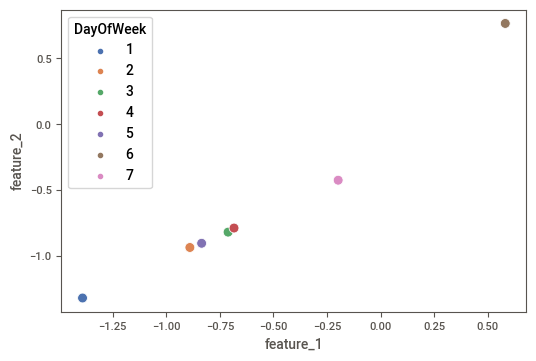

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=a, x='feature_1', y='feature_2', hue='DayOfWeek', palette='deep', s=50)
plt.legend(title='DayOfWeek')

In [180]:
b = pd.concat([X_train, y_train],axis=1)
pd.DataFrame(b.groupby('DayOfWeek')['Sales'].mean()).reset_index().rename({'Sales':'mean_sales'},axis=1)

,DayOfWeek,mean_sales
0,1,7809.044510
1,2,7005.244467
2,3,6555.884138
3,4,6247.575913
4,5,6723.274305
5,6,5847.562599
6,7,204.183189


In [120]:
train_pred = embed_model.predict(X_train[var])
test_pred = embed_model.predict(test_data[var])

[array([   0,    0,    0, ..., 1114, 1114, 1114], dtype=int32), array([2, 2, 2, ..., 3, 3, 3], dtype=int32)]
total inputs: 
31788/31788 [==============================] - 11s 333us/step


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [109]:
X_train_embeddings = embed_model.transform(X_train[var])
X_train_embeddings

      Store  Store_index
0         1            0
1         2            1
2         3            2
3         4            3
4         5            4
...     ...          ...
1110   1111         1110
1111   1112         1111
1112   1113         1112
1113   1114         1113
1114   1115         1114

[1115 rows x 2 columns]
  StoreType  StoreType_index
0         a                0
1         b                1
2         c                2
3         d                3


,Store,Open,StoreType,Store_0,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,...,Store_42,Store_43,Store_44,Store_45,Store_46,Store_47,Store_48,Store_49,StoreType_0,StoreType_1
0,1,1,c,-0.046380,-0.070164,-0.085546,0.054663,-0.082964,0.040431,0.059235,...,0.079152,0.038204,-0.098588,0.007321,0.102424,-0.078481,-0.059800,-0.035342,0.606390,-0.532044
1,1,1,c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.606390,-0.532044
2,1,1,c,-0.046380,-0.070164,-0.085546,0.054663,-0.082964,0.040431,0.059235,...,0.079152,0.038204,-0.098588,0.007321,0.102424,-0.078481,-0.059800,-0.035342,0.606390,-0.532044
3,1,1,c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.606390,-0.532044
4,1,1,c,-0.046380,-0.070164,-0.085546,0.054663,-0.082964,0.040431,0.059235,...,0.079152,0.038204,-0.098588,0.007321,0.102424,-0.078481,-0.059800,-0.035342,0.606390,-0.532044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569773,1097,1,b,-0.211977,-0.241613,-0.279667,0.238646,-0.238251,0.216923,0.253797,...,0.245005,0.259364,-0.240164,0.220367,0.308087,-0.232557,-0.267985,-0.261742,0.342286,-0.444455
1569774,1097,1,b,-0.211977,-0.241613,-0.279667,0.238646,-0.238251,0.216923,0.253797,...,0.245005,0.259364,-0.240164,0.220367,0.308087,-0.232557,-0.267985,-0.261742,0.342286,-0.444455
1569775,1097,1,b,-0.211977,-0.241613,-0.279667,0.238646,-0.238251,0.216923,0.253797,...,0.245005,0.259364,-0.240164,0.220367,0.308087,-0.232557,-0.267985,-0.261742,0.342286,-0.444455
1569776,1097,1,b,-0.211977,-0.241613,-0.279667,0.238646,-0.238251,0.216923,0.253797,...,0.245005,0.259364,-0.240164,0.220367,0.308087,-0.232557,-0.267985,-0.261742,0.342286,-0.444455


In [112]:
test_data['Store'] = test_data['Store'].astype('category')
X_test_embeddings = embed_model.transform(test_data[var])
X_test_embeddings

      Store  Store_index
0         1            0
1         2            1
2         3            2
3         4            3
4         5            4
...     ...          ...
1110   1111         1110
1111   1112         1111
1112   1113         1112
1113   1114         1113
1114   1115         1114

[1115 rows x 2 columns]
  StoreType  StoreType_index
0         a                0
1         b                1
2         c                2
3         d                3


,Store,Open,StoreType,Store_0,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,...,Store_42,Store_43,Store_44,Store_45,Store_46,Store_47,Store_48,Store_49,StoreType_0,StoreType_1
0,1,1.0,c,-0.046380,-0.070164,-0.085546,0.054663,-0.082964,0.040431,0.059235,...,0.079152,0.038204,-0.098588,0.007321,0.102424,-0.078481,-0.059800,-0.035342,0.606390,-0.532044
1,1,1.0,c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.606390,-0.532044
2,1,1.0,c,-0.046380,-0.070164,-0.085546,0.054663,-0.082964,0.040431,0.059235,...,0.079152,0.038204,-0.098588,0.007321,0.102424,-0.078481,-0.059800,-0.035342,0.606390,-0.532044
3,1,1.0,c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.606390,-0.532044
4,1,1.0,c,-0.046380,-0.070164,-0.085546,0.054663,-0.082964,0.040431,0.059235,...,0.079152,0.038204,-0.098588,0.007321,0.102424,-0.078481,-0.059800,-0.035342,0.606390,-0.532044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63259,1097,1.0,b,-0.211977,-0.241613,-0.279667,0.238646,-0.238251,0.216923,0.253797,...,0.245005,0.259364,-0.240164,0.220367,0.308087,-0.232557,-0.267985,-0.261742,0.342286,-0.444455
63260,1097,1.0,b,-0.211977,-0.241613,-0.279667,0.238646,-0.238251,0.216923,0.253797,...,0.245005,0.259364,-0.240164,0.220367,0.308087,-0.232557,-0.267985,-0.261742,0.342286,-0.444455
63261,1097,1.0,b,-0.211977,-0.241613,-0.279667,0.238646,-0.238251,0.216923,0.253797,...,0.245005,0.259364,-0.240164,0.220367,0.308087,-0.232557,-0.267985,-0.261742,0.342286,-0.444455
63262,1097,1.0,b,-0.211977,-0.241613,-0.279667,0.238646,-0.238251,0.216923,0.253797,...,0.245005,0.259364,-0.240164,0.220367,0.308087,-0.232557,-0.267985,-0.261742,0.342286,-0.444455


In [3]:
import tensorflow as tf

# Number of categories and embedding dimension
n_categories = 4
embedding_dim = 3

# Define the embedding layer
embedding_layer = tf.keras.layers.Embedding(input_dim=n_categories, output_dim=embedding_dim)

# Example input indices
input_indices1 = tf.constant([0, 2, 1])
input_indices2 = tf.constant([1, 2, 0])

# Get the embedding vectors
embedding_vectors1 = embedding_layer(input_indices1)
embedding_vectors2 = embedding_layer(input_indices2)

print("Input indices:", input_indices1.numpy())
print("Embedding vectors:\n", embedding_vectors1.numpy())
print('\n')
print("Input indices:", input_indices2.numpy())
print("Embedding vectors:\n", embedding_vectors2.numpy())

Input indices: [0 2 1]
Embedding vectors:
 [[ 0.00152845 -0.02791435 -0.04230552]
 [ 0.00633038 -0.01229249 -0.00330721]
 [-0.02347742 -0.04359686 -0.02026496]]


Input indices: [1 2 0]
Embedding vectors:
 [[-0.02347742 -0.04359686 -0.02026496]
 [ 0.00633038 -0.01229249 -0.00330721]
 [ 0.00152845 -0.02791435 -0.04230552]]


In [87]:
{i:33 for i in range(10)}

{0: 33, 1: 33, 2: 33, 3: 33, 4: 33, 5: 33, 6: 33, 7: 33, 8: 33, 9: 33}